# **CRASH COURSE: LINEAR REGRESSION, RANDOM FOREST, DECISION TREE**

## **LINEAR REGRESSION**

Linear regression is a statistical method used to model the relationship between two or more variables, where one variable is the independent variable and the other is the dependent variable.It assumes that the relationship between the variables is linear, meaning that there is a straight-line relationship between the variables.

The goal of linear regression is to find the line that best fits the data points by minimizing the differences between the predicted values and the actual values. The line can then be used to predict the values of the dependent variable based on the values of the independent variable(s).

For example, if we have data on the height and weight of a group of people, we can use linear regression to determine how much weight can be predicted based on the height. The line that best fits the data will be the one that minimizes the differences between the predicted and actual weights.
Linear regression can be used to analyze this data set and try to understand how different variables are related to each other.

You would then split the data into training and testing sets, and use the training set to fit a linear regression model.

Once you have a fitted model, you can use it to make predictions on the testing set and evaluate its accuracy. This will give you an idea of how well the selected variables can predict university rankings.

### **Properties of Linear Regression**

**Linearity:** Linear regression assumes that the relationship between the dependent variable and independent variable(s) is linear, meaning that the relationship can be expressed as a straight line.

**Independence:** Linear regression assumes that the observations are independent of each other. This means that the value of one observation should not depend on the value of another observation.

**Homoscedasticity:** Linear regression assumes that the variance of the errors (or residuals) is constant across all levels of the independent variable(s). This is known as homoscedasticity.

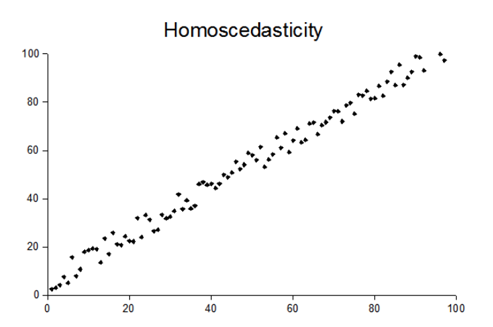


**Normality:** Linear regression assumes that the errors (or residuals) are normally distributed. This means that the errors follow a bell-shaped curve, with most of the errors close to zero and fewer errors further away from zero.

**No multicollinearity:** Linear regression assumes that the independent variables are not highly correlated with each other. This is known as multicollinearity, and can cause problems with interpreting the results of the regression analysis.

**Additivity**: Linear regression assumes that the effect of each independent variable on the dependent variable is additive. This means that the effect of changing one independent variable does not depend on the values of the other independent variables.

### **Mathematical Logic behind Linear Regression**

The mathematical logic of linear regression involves finding the line of best fit that represents the relationship between two variables, usually referred to as the independent variable (x) and the dependent variable (y). The equation of a straight line can be written as y = mx + b, where m is the slope of the line and b is the y-intercept.

The goal of linear regression is to find the values of m and b that minimize the sum of squared errors between the predicted values of y and the actual values of y for each data point. This is done using a method called the least squares regression, which involves finding the values of m and b that minimize the sum of the squared vertical distances between each data point and the line of best fit.

To find the values of m and b that minimize the sum of squared errors, the following formulas are used:

***m = (nΣ(xy) - ΣxΣy) / (nΣ(x^2) - (Σx)^2)***

***b = (Σy - mΣx) / n***

where n is the number of data points, Σ represents the sum of the values, and x and y represent the independent and dependent variables, respectively.

Once the values of m and b are determined, they can be used to predict the value of y for any given value of x. This makes linear regression a useful tool for understanding the relationship between two variables and making predictions based on that relationship.

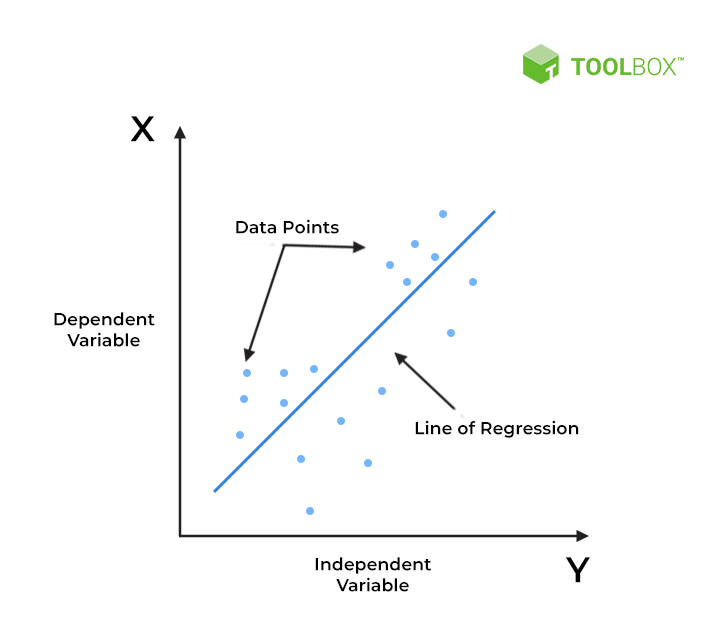

###**Illustration**

We will explain this by working on a dataset to analyse world's top universities. We are exploring the QS World University Rankings® 2023 based on 8 key ranking indicators.
This year’s QS World University Rankings include almost 1,500 institutions from around the world.


#### **Data Definition**

***Understanding the data:***

**Target Variables/Dependent Variables**

- **Rank** - What is helping find the ranks of the university. This is the variable we have to predict.



**Predictor Variables/Independent Variables**

- **ar score** - Academic Reputation score

- **er score** - Employer Reputation score

- **fsr score** - Faculty Student score

- **cpf score**- Citations per faculty score

- **ifr score** - International Faculty score

- **isr score** - International Students score

- **irn score** - International Research Network score

- **ger score** - Employment Outcome score



#### **Importing necessary libraries**
In first step, it is mandatory to install all the required libraries. Some of the most common libraries that are used are as follows.

*   numpy (imported as np): Often used numerical computing library for Python that is used to work with arrays, matrices, mathematical coding on them.
*   pandas (imported as pd): A powerful data manipulation library for Python that provides in a flexible way for data structures such as DataFrame for handling and analyzing data.
*   matplotlib.pyplot (imported as plt): A popular data visualization library for Python that provides functions for creating various types of plots:line, scatter, and bar plots, amongst many.
*   seaborn (imported as sns): A statistical data visualization library based on matplotlib that provides additional functionalities and aesthetic improvements for creating attractive visualizations.
*  train_test_split: A function for splitting a dataset into training and testing sets for machine learning model evaluation.

In [ ]:
#Importing all the necessary libraries required to explain how it works
!pip install eli5
!pip install shap
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future
!pip install yellowbrick

import numpy as np
import pandas as pd
import seaborn as sns
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import matplotlib.pylab as plt
from matplotlib import pyplot
import statsmodels.api as sm
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestRegressor


from sklearn.preprocessing import LabelEncoder 
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


import warnings
warnings.filterwarnings('ignore')


#### **Reading the Data**

We can read the dataset file various ways. By locally being on system, additionally adding it in the IDE being used, or directly as a link on cloud(kaggle, github). I am reading the dataset from Github.

Our dataset on university rankings contains information about the rankings of universities around the world, based on a variety of factors such as research output, reputation, academic excellence, etc

In [ ]:
# Reading csv file into Pandas Dataframe
df = pd.read_csv('https://raw.githubusercontent.com/shriyapandita06/shriyapandita06/main/2023%20QS%20World%20University%20Rankings%20(1).csv')
df.head(4)

,Rank,institution,location code,location,ar score,ar rank,er score,er rank,fsr score,fsr rank,...,cpf rank,ifr score,ifr rank,isr score,isr rank,irn score,irn rank,ger score,ger rank,score scaled
0,1,Massachusetts Institute of Technology (MIT),US,United States,100.0,5,100.0,4,100.0,14,...,5,100.0,54,90.0,109,96.1,58,100.0,3,100
1,2,University of Cambridge,UK,United Kingdom,100.0,2,100.0,2,100.0,11,...,55,100.0,60,96.3,70,99.5,6,100.0,9,98.8
2,3,Stanford University,US,United States,100.0,4,100.0,5,100.0,6,...,9,99.8,74,60.3,235,96.3,55,100.0,2,98.5
3,4,University of Oxford,UK,United Kingdom,100.0,3,100.0,3,100.0,8,...,64,98.8,101,98.4,54,99.9,3,100.0,7,98.4


#### **Pre-Processing of Data**

This is one of the most crucial steps.Raw data rarely is in the form we need for analysis. The data usually consists of alot of information. We need to focus and filter to find the important ones that we can use as features. For eg, in the world ranking dataset we are trying to find which features are the most important to help us understanding the world ranking is dependent on. We can think of eliminating the various rank columns as those wont help us find the main rank in anyway.

Pre processing also involves understanding the data you have, summarising it, sorting the data and finding for any anomalies such as null values or missing data. If we do not handle this, we will get unpredictable results 


In [ ]:
# Getting the dimensions of the dataframe
df.shape

(1422, 21)

In [ ]:
# Summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1422 entries, 0 to 1421
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rank           1422 non-null   int64  
 1   institution    1422 non-null   object 
 2   location code  1422 non-null   object 
 3   location       1422 non-null   object 
 4   ar score       1422 non-null   float64
 5   ar rank        1422 non-null   object 
 6   er score       1421 non-null   float64
 7   er rank        1422 non-null   object 
 8   fsr score      1420 non-null   float64
 9   fsr rank       1422 non-null   object 
 10  cpf score      1417 non-null   float64
 11  cpf rank       1422 non-null   object 
 12  ifr score      1324 non-null   float64
 13  ifr rank       1324 non-null   object 
 14  isr score      1365 non-null   float64
 15  isr rank       1365 non-null   object 
 16  irn score      1409 non-null   float64
 17  irn rank       1409 non-null   object 
 18  ger scor

In [ ]:
# Dropping data fields not required for analysis 
df2 = df.copy()
df2.drop(columns = ['institution','location','location code','ar rank','er rank','fsr rank','cpf rank','ifr rank','isr rank','irn rank','ger rank','score scaled'], inplace = True)
df2.head()

,Rank,ar score,er score,fsr score,cpf score,ifr score,isr score,irn score,ger score
0,1,100.0,100.0,100.0,100.0,100.0,90.0,96.1,100.0
1,2,100.0,100.0,100.0,92.3,100.0,96.3,99.5,100.0
2,3,100.0,100.0,100.0,99.9,99.8,60.3,96.3,100.0
3,4,100.0,100.0,100.0,90.0,98.8,98.4,99.9,100.0
4,5,100.0,100.0,99.4,100.0,76.9,66.9,100.0,100.0


In [ ]:
# Checking for count of null values 
df2.isnull().sum()

Rank          0
ar score      0
er score      1
fsr score     2
cpf score     5
ifr score    98
isr score    57
irn score    13
ger score    12
dtype: int64

#### **Dealing with Missing Values**

There are several ways to deal with Missing Values.

1. Easiest way is to drop the corresponding columns/rows entirely. One can do that using the dropna function. Cons of this method is that we might loose too much valuable data.

2. Another way is by imputing missing Values. There are several ways to do it. 
- **Mean Imputation:** Here we replace the missing valyes with the mean value of entire feature colmun. 
- **Median Imputation:** Here we replace the missing valyes with the median value of entire feature colmun.
- **KNN Imputation:** Try to find the K nearest universities to the University missing based on the information that is not missing (e.g., ranking score, country, etc.). Once you have identified the K nearest universities, you could use their number of students to estimate the missing value for that University.



##### **Logic behind how KNN Works**

KNN imputation uses the distances between data points to identify the K nearest neighbors of a data point with a missing value. Once the K nearest neighbors have been identified, their values are used to impute (or estimate) the missing value for the data point of interest.

The distance between two data points can be calculated using various distance metrics, such as Euclidean distance, Manhattan distance, or cosine distance. Euclidean distance is one of the most commonly used distance metrics in KNN imputation. It is calculated as:

***distance = sqrt(sum((x1 - x2)^2))***

Where x1 and x2 are two data points with p features.

To impute a missing value using KNN imputation, the following steps are typically taken:

- Identify the data point with the missing value.

- Calculate the distances between the data point with the missing value and all other data points in the dataset.

- Select the K nearest neighbors to the data point with the missing value based on the calculated distances.

- Take the average (or weighted average) of the values of the K nearest neighbors for the feature with the missing value.

- Replace the missing value with the imputed value.

For example, let's say we want to impute a missing value for the number of students at the University of Tokyo using KNN imputation with K=3. We would start by calculating the distances between the University of Tokyo and all other universities in the dataset. We would then select the three universities that are closest to the University of Tokyo based on the calculated distances. Finally, we would take the average of the number of students at these three universities and use this value to impute the missing value for the University of Tokyo.

In summary, KNN imputation uses distance metrics and the values of the K nearest neighbors to impute missing values in a dataset. The choice of distance metric and the value of K can impact the accuracy of the imputed values.






In [ ]:
# Creating a copy of the dataframe
newdata= df2.copy()
newdata.head()

,Rank,ar score,er score,fsr score,cpf score,ifr score,isr score,irn score,ger score
0,1,100.0,100.0,100.0,100.0,100.0,90.0,96.1,100.0
1,2,100.0,100.0,100.0,92.3,100.0,96.3,99.5,100.0
2,3,100.0,100.0,100.0,99.9,99.8,60.3,96.3,100.0
3,4,100.0,100.0,100.0,90.0,98.8,98.4,99.9,100.0
4,5,100.0,100.0,99.4,100.0,76.9,66.9,100.0,100.0


In [ ]:
# performing knn imputation to fill in the missing values
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
imputer = KNNImputer(n_neighbors=5)
df2 = pd.DataFrame(imputer.fit_transform(df2), columns = df2.columns)

df2.isnull().sum()

Rank         0
ar score     0
er score     0
fsr score    0
cpf score    0
ifr score    0
isr score    0
irn score    0
ger score    0
dtype: int64

In [ ]:
# Viewing information about the dataframe features
df2.describe()

,Rank,ar score,er score,fsr score,cpf score,ifr score,isr score,irn score,ger score
count,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000,1422.000000
mean,711.500000,20.124684,20.650914,29.964937,24.460028,30.331561,25.808776,49.399409,26.100647
std,410.640354,22.802706,24.020620,28.165843,27.886674,33.455492,30.542261,30.144495,26.117151
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,356.250000,5.400000,4.400000,8.200000,3.100000,4.800000,3.200000,21.625000,6.800000
50%,711.500000,10.800000,10.300000,18.200000,10.950000,12.640000,10.300000,47.000000,15.500000
75%,1066.750000,23.775000,26.950000,43.475000,39.200000,49.075000,38.700000,77.375000,36.300000
max,1422.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


#### **Summary Statistics**

This table shows summary statistics for a dataset with 1422 observations and 9 variables.

The variables are: 'Rank', 'ar score', 'er score', 'fsr score', 'cpf score', 'ifr score', 'isr score', 'irn score' and 'ger score'.

The "count" row shows the number of observations for each variable, while the "mean" row shows the average value of each variable.

The "std" row shows the standard deviation of each variable, which is a measure of how much the values vary from the mean.

The "min" and "max" rows show the smallest and largest values observed for each variable.

The "25%", "50%", and "75%" rows show the values at the 25th, 50th, and 75th percentiles of the distribution, respectively.

These percentiles divide the observations into quarters, with the 25th percentile being the value below which 25% of the observations fall, and so on.

###**Why we Split data into Train and Test**

When we build a machine learning model, our goal is to train it to make accurate predictions on new data that it hasn't seen before. To do this, we first try to teach the modelto make predictions based on data that we have. We use a portion of the available data to train the model, and then we evaluate its performance on another portion of the data that it hasn't seen before.

Splitting the data into a training set and a test set helps us achieve this goal. We use the training set to train the model. We do this by showing the model a bunch of examples and telling it what the correct predictions should be. The model uses this information to learn how to make predictions on its own.

Once the model is trained, we evaluate its performance on the test set. The test set is a portion of the data that the model hasn't seen before. We compare the model's predictions to the correct answers in the test set and measure how accurately the model was able to predict them.


In [ ]:
# Splitting data into train and test sets
train, test = train_test_split(df2, test_size=0.2, random_state=17)

print(f"No. of training examples: {train.shape[0]}")
print(f"No. of testing examples: {test.shape[0]}")

No. of training examples: 1137
No. of testing examples: 285


- By using multiple linear regression, you can examine the effect of each independent variable on the dependent variable while controlling for the effects of other independent variables. This makes it a powerful tool for analyzing complex relationships between variables. In our case, we have one dependent variable: Rank and rest all are independent variables. 
- We will be dropping our dependent variable Rank and creating sets to train and test data accordingly. This will help us train model to help us get close to accurate rankings and help us understand the model by testing it.

In [ ]:
# Separating predictors and target variables for train and test sets
x_train=train.drop('Rank',axis=1)
y_train=train[['Rank']]

x_test=test.drop('Rank',axis=1)
y_test=test[['Rank']]

# Checking the shapes of the resulting dataframes
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1137, 8), (1137, 1), (285, 8), (285, 1))

###**Fitting a Linear Regression Model**

- This code creates an instance of the LinearRegression class, which represents a linear regression model that can be trained and used for prediction.

- The fit() method is then called on the LinearRegression object, which fits (or trains) the model to the training data by computing the coefficients that minimize the sum of squared errors between the predicted and actual target values. In other words, the fit() method adjusts the model parameters to find the best line that fits the training data as closely as possible.

- x_train is a 2D array containing the feature values of the training data, and y_train is a 1D array containing the corresponding target variable values.

- After this code runs, the lr object will contain the trained linear regression model, which can be used to make predictions on new data using the predict() method.

In [ ]:
# Fitting a linear regression model on the training data
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

### **Evaluating the model performance**

- The code is evaluating the performance of a trained linear regression model on a test dataset by calculating the R-squared score, which is a measure of how well the model fits the test data. 
- The score() method of the LinearRegression object is used to calculate this score, and the result is stored in the lr_score variable

In [ ]:
# Scoring the model on the test data
lr_score = lr.score(x_test, y_test)
print(f"Linear Regression score: {lr_score}")

Linear Regression score: 0.832144866167164


###**Predicting Values**

- Uses a trained linear regression model to predict target variable values for the test dataset.
- Prints the predicted values and the actual values of the target variable for the first 5 rows of the test dataset.
- The predict() method of the LinearRegression object is used to make predictions on the x_test data, which are stored in the y_pred variable. 
- The flatten() method is called on y_pred and y_test.values to convert them from multidimensional arrays to one-dimensional arrays. 

In [ ]:
# Predicting target variable for test data
y_pred = lr.predict(x_test)
print(f"Predicted values: {y_pred.flatten()[:5]}")
print(f"Actual values: {y_test.values.flatten()[:5]}")

Predicted values: [ 648.00068122  139.55102539  799.95364833  725.17968641 1131.82359413]
Actual values: [524. 199. 823. 428. 915.]


### **Evaluating the Performance of the Model**

This code evaluates the performance of the linear regression model using four metrics: Mean Squared Error (MSE), Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), and R2 Score.

- The mean_squared_error() function is used to calculate the mean squared error between the predicted and actual target variable values of the test data, which is stored in lr_mse.

- The mean_squared_error() function is used again with the squared=False parameter to calculate the root mean squared error, which is stored in lr_rmse.

- The mean_absolute_error() function is used to calculate the mean absolute error between the predicted and actual target variable values of the test data, which is stored in lr_mae.

- The r2_score() function is used to calculate the R2 score, which measures the proportion of variance in the target variable that is predictable from the predictor variables, and is stored in lr_r.


In [ ]:
# Evaluating the performance of the model
lr_mse = mean_squared_error(y_test.values, y_pred)
lr_rmse = mean_squared_error(y_test.values, y_pred,squared=False) #RMSE
lr_mae = mean_absolute_error(y_test.values, y_pred)
lr_r = r2_score(y_test.values, y_pred)

print('Score Mean Squared Error      = {}'.format(lr_mse))
print('Score Root Mean Squared Error = {}'.format(lr_rmse))
print('Score Mean Absolute Error     = {}'.format(lr_mae))
print('Score R2                      = {}'.format(lr_r))

Score Mean Squared Error      = 29967.236882059016
Score Root Mean Squared Error = 173.11047594544652
Score Mean Absolute Error     = 143.34263198040935
Score R2                      = 0.832144866167164


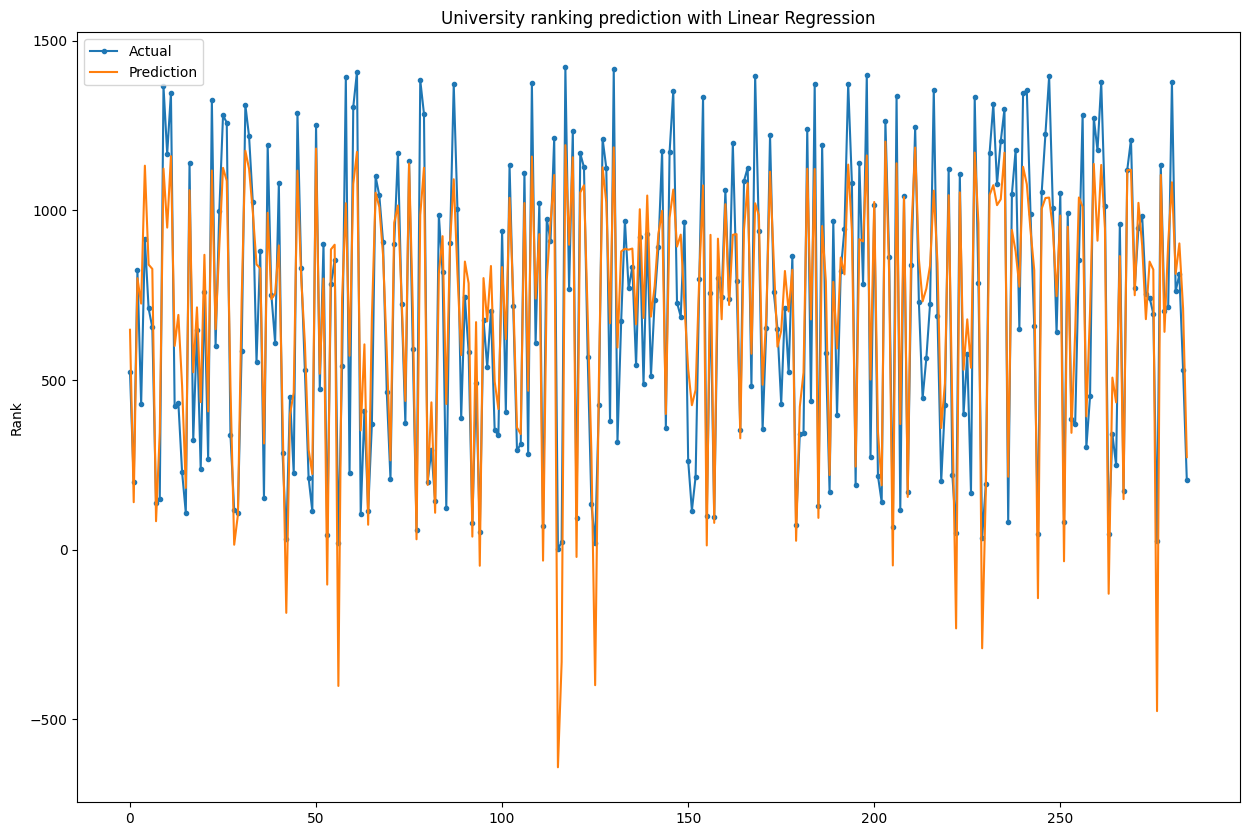

In [ ]:
# Plotting actual vs predicted values
plt.figure(figsize=(15,10))
plt.plot(range(len(y_test)), y_test, marker='.', label="Actual")
plt.plot(range(len(y_test)), y_pred.flatten(), label="Prediction")
plt.ylabel('Rank')
plt.title('University ranking prediction with Linear Regression')
plt.legend()
plt.show()


In [ ]:
# Creating a dataframe with actual and predicted values
prediction = pd.DataFrame()
prediction['Actual'] = y_test.values.flatten()
prediction['Linear Regression'] = y_pred.flatten()
prediction['Linear Regression'] = prediction['Linear Regression'].round(0)
prediction.head()

,Actual,Linear Regression
0,524.0,648.0
1,199.0,140.0
2,823.0,800.0
3,428.0,725.0
4,915.0,1132.0


### **Interpretation**

- The table shows a comparison between the actual values of the target variable and the predicted values by the linear regression model.

- For each row, the first column represents the actual value and the second column represents the predicted value by the model.

- We can see that for some rows, the model prediction is close to the actual value, while for others, there is a significant difference between the actual and predicted values.





##**DECISION TREE**

A decision tree is a type of supervised learning algorithm used in machine learning and data mining. It is a tree-like model in which each internal node represents a test on an attribute, each branch represents the outcome of the test, and each leaf node represents a class label.

The primary goal of the decision tree algorithm is to create a model that predicts the value of a target variable based on several input variables. The algorithm works by recursively partitioning the input space into subsets based on the values of the input variables, with the goal of minimizing the impurity of each partition.

Some important concepts in decision tree include:

- **Entropy:** a measure of the impurity of a set of examples. It is used to determine which attribute to split on at each node.
- **Information gain:** the reduction in entropy achieved by partitioning the examples according to an attribute. The attribute with the highest information gain is chosen for splitting.
- Pruning: the process of removing nodes from the tree to prevent overfitting.

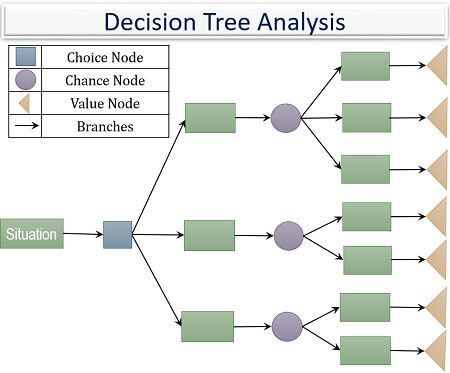

Let us understand some of the relevant concepts used in the above decision tree:

- **Root Node:** A root node compiles the whole sample, it is then divided into multiple sets which comprise of homogeneous variables.
- **Decision Node:** That sub-node which diverges into further possibilities, can be denoted as a decision node.
- **Terminal Node:** The final node showing the outcome which cannot be categorized any further, is termed as a value or terminal node.
Branch: A branch denotes the various alternatives available with the decision tree maker.
- Splitting: The division of the available option (depicted by a node or sub-node) into multiple sub-nodes is termed as splitting.
Pruning: It is just the reverse of splitting, where the decision tree maker can eliminate one or more sub-nodes from a particular decision node.

### **Logic behind Decision Tree**

The mathematics behind decision trees can be explained through the concept of entropy, which measures the amount of uncertainty or randomness in a system.

Entropy can be defined as:

***H(S) = - Σ p(x) log2 p(x)***

where H(S) is the entropy of a system S, p(x) is the probability of a particular outcome x, and log2 is the base-2 logarithm.

The entropy of a system is maximum when all outcomes are equally likely, and minimum when there is only one outcome. In a decision tree, the entropy is used to measure the impurity or randomness of a group of data points, which are split based on the values of a feature.

The information gain is then calculated as the difference between the entropy of the parent node and the weighted average of the child nodes' entropy, where the weights are the proportion of data points in each child node.

Information gain is used to determine which feature to split on at each node, and the splitting process continues recursively until the tree reaches a maximum depth or all data points belong to the same class.

The decision tree algorithm aims to create a tree that has the highest information gain at each node, resulting in a tree that has the most predictive power for the given dataset.

Lets see how the algorithm works with the example we have used above: University Rankings 

### **Fitting a decision tree model on the training data**

- The Decision Tree algorithm works by recursively splitting the dataset into subsets based on the features and values that best separate the target variable (in this case, the continuous value we want to predict). 
- At each node of the tree, the algorithm evaluates which feature and value will result in the greatest reduction in the variance of the target variable. This reduction in variance is calculated using a metric such as mean squared error (MSE). The splits continue until a stopping criterion is reached, such as when all samples at a node have the same target value or when a maximum depth is reached.

- After initializing the Decision Tree model, dt.fit(x_train, y_train) trains the model on the training data x_train and y_train, meaning it adjusts the model parameters to minimize the prediction error on the training data. 
- This is done by recursively splitting the data using the above logic, and assigning values to the leaves of the tree that minimize the MSE within each subset. Once the model is trained, it can be used to predict the target variable on new data.

In [ ]:
# Fitting a decision tree model on the training data
dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)

DecisionTreeRegressor()

### **Finding the R-squared score of the model on the test data**

The below code computes the coefficient of determination (R^2 score) of the decision tree regression model dt on the test data (x_test, y_test) and stores the value in the variable dt_score.

In [ ]:
#Finding the R-squared score of the model on the test data
dt_score = dt.score(x_test, y_test)
dt_score

0.9043688508025043

### **Evaluating the performance of the model**

- The code below makes predictions using the trained decision tree regression model dt on the test data x_test and stores the predicted values in the variable y_pred.
- Then, it prints the first 5 predicted values using flatten() method to convert the 2D array to 1D and selects the first 5 elements using slicing [:5].
- Finally, it also prints the first 5 actual target values of the test data y_test using flatten() method to convert the 2D array to 1D and selects the first 5 elements using slicing [:5].
- This code is used to compare the predicted values with the actual target values to evaluate the performance of the model.

In [ ]:
y_pred = dt.predict(x_test)
print(y_pred.flatten()[:5])
print(y_test.values.flatten()[:5])

[407. 280. 803. 478. 917.]
[524. 199. 823. 428. 915.]


- The code below uses scikit-learn's regression metrics to evaluate the performance of the decision tree regression model dt on the test data y_test and predicted target values y_pred.

- mean_squared_error() calculates the mean squared error between the actual and predicted values, while mean_absolute_error() calculates the mean absolute error. r2_score() calculates the coefficient of determination R^2 of the prediction.

- The second argument of mean_squared_error() sets squared=True by default, which calculates the MSE. If we set squared=False, it will return the root mean squared error (RMSE).

- The code then prints the computed values of MSE, RMSE, MAE, and R^2.

- These metrics provide insight into the accuracy of the model predictions, where lower values of MSE, RMSE, and MAE indicate better performance, while higher values of R^2 indicate better fit of the model to the data.

In [ ]:
dt_mse = mean_squared_error(y_test.values, y_pred)
dt_rmse = mean_squared_error(y_test.values, y_pred,squared=False) #RMSE
dt_mae = mean_absolute_error(y_test.values, y_pred)
dt_r = r2_score(y_test.values, y_pred)

print('Score Mean Squared Error      = {}'.format(dt_mse))
print('Score Root Mean Squared Error = {}'.format(dt_rmse))
print('Score Mean Absolute Error     = {}'.format(dt_mae))
print('Score R2                      = {}'.format(dt_r))

Score Mean Squared Error      = 17073.063157894736
Score Root Mean Squared Error = 130.66393212319434
Score Mean Absolute Error     = 91.43508771929825
Score R2                      = 0.9043688508025043


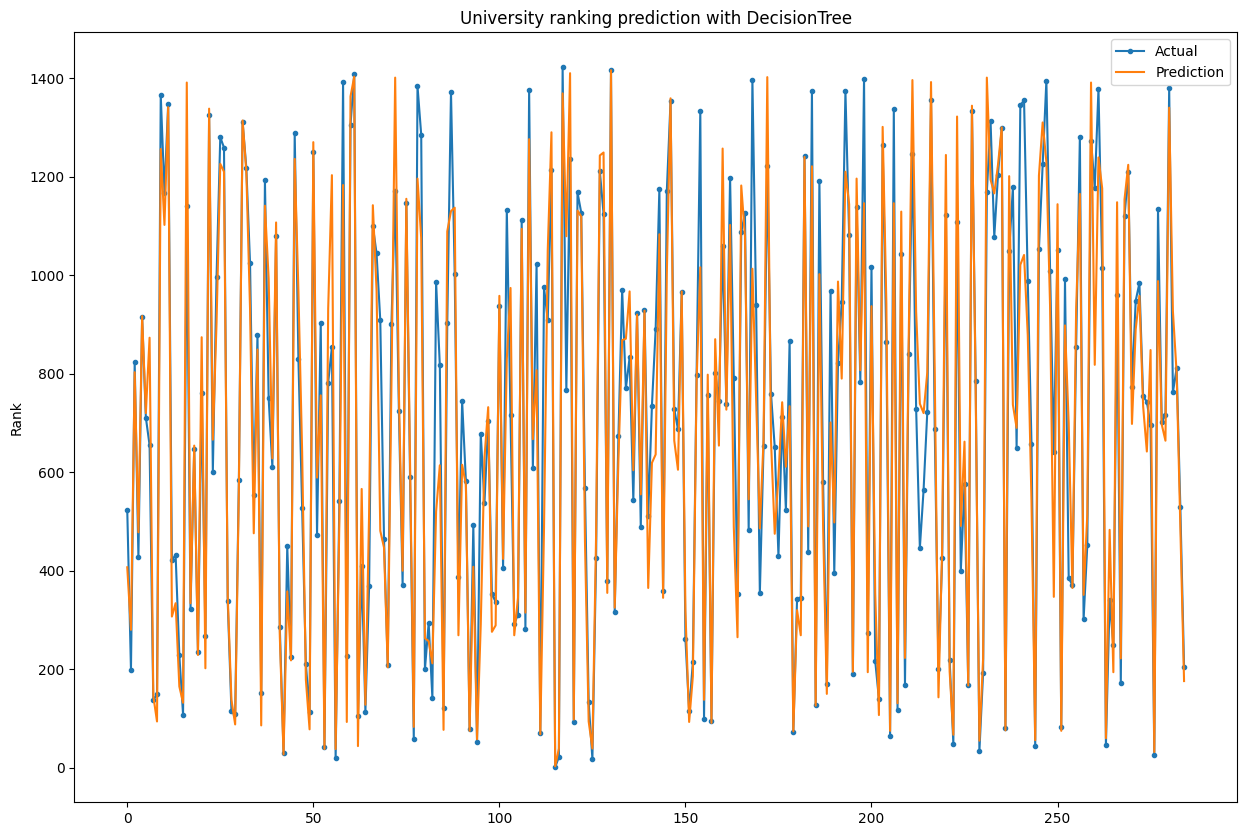

In [ ]:
# Plotting actual vs predicted values
plt.figure(figsize=(15,10))
plt.plot(range(len(y_test)), y_test, marker='.', label="Actual")
plt.plot(range(len(y_test)), y_pred.flatten(), label="Prediction")
plt.ylabel('Rank')
plt.title('University ranking prediction with DecisionTree')
plt.legend()
plt.show()

In [ ]:
# Comparison on the values obtained with Linear Regression and Decision Tree
prediction['DecisionTree'] = y_pred.flatten()
prediction['DecisionTree'] = prediction['DecisionTree'].round(0)
prediction.head(4) 

,Actual,Linear Regression,DecisionTree
0,524.0,648.0,407.0
1,199.0,140.0,280.0
2,823.0,800.0,803.0
3,428.0,725.0,478.0


In [ ]:
#Comparing the scores of Linear Regression and Decision Tree
from tabulate import tabulate

table = [["Model", "MSE", "RMSE", "MAE", "R^2"],
         ["Decision Tree", dt_mse, dt_rmse, dt_mae, dt_r],
         ["Linear Regression", lr_mse, lr_rmse, lr_mae, lr_r]]

print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))


╒═══════════════════╤═════════╤═════════╤══════════╤══════════╕
│ Model             │     MSE │    RMSE │      MAE │      R^2 │
╞═══════════════════╪═════════╪═════════╪══════════╪══════════╡
│ Decision Tree     │ 17073.1 │ 130.664 │  91.4351 │ 0.904369 │
├───────────────────┼─────────┼─────────┼──────────┼──────────┤
│ Linear Regression │ 29967.2 │ 173.11  │ 143.343  │ 0.832145 │
╘═══════════════════╧═════════╧═════════╧══════════╧══════════╛


#### **Inference from the above table**

- The Decision Tree model performed better than the Linear Regression model in terms of MSE and RMSE, which indicate how well the model's predictions match the actual values. Lower values of these metrics indicate better performance.
- The Decision Tree model also performed better in terms of R^2, which measures how well the model fits the data. A higher value of R^2 indicates a better fit.
- However, the Linear Regression model performed better in terms of MAE, which measures the average magnitude of the errors in the model's predictions. A lower value of MAE indicates better performance.

**Overall, the Decision Tree model appears to be a better choice for this dataset, as it outperformed the Linear Regression model in most metrics.**

## **RANDOM FOREST** 

- Random Forest is an ensemble learning technique that combines multiple decision trees to create a more robust and accurate model. 
- In Random Forest, multiple decision trees are built using a random subset of the data and a random subset of the features for each tree. This randomness helps to reduce overfitting and increase the generalization performance of the model.
- During training, each tree is built independently using a random subset of the data and features. The final prediction is then made by averaging the predictions of all the trees in the forest.
- Random Forest has several advantages over single decision trees, including better accuracy, robustness to noise, and the ability to handle large datasets with many features.
- Some key hyperparameters in Random Forest include the number of trees in the forest, the maximum depth of each tree, and the number of features to consider at each split.
- Random Forest is commonly used for both regression and classification problems.

### **Mathematical Logic of Random Forest** 

The mathematical logic of Random Forest is based on the central limit theorem, which states that the average of a large number of independent and identically distributed random variables will tend towards a normal distribution.

- The central limit theorem is a fundamental concept in statistics and probability theory that states that the sum or average of a large number of independent and identically distributed random variables will tend towards a normal distribution, regardless of the underlying distribution of the individual variables.

- In the context of Random Forest, the central limit theorem is applied to the predictions of multiple independent decision trees, which are combined by averaging their predictions.

- Because each decision tree in the forest is trained using a random subset of the data and features, the resulting predictions are independent and identically distributed random variables.

- By averaging the predictions of multiple decision trees, Random Forest leverages the central limit theorem to improve the accuracy and robustness of the model.

- The central limit theorem is a key concept in many other statistical and machine learning techniques, and is widely used in fields such as finance, physics, and engineering.

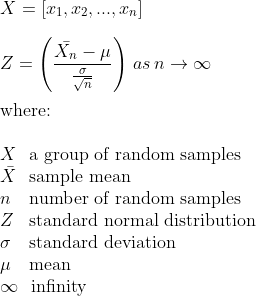

### **Fitting a random forest model on training data**

RandomForestRegressor: This is a class in the scikit-learn library that implements the Random Forest algorithm for regression problems. The max_depth parameter specifies the maximum depth of each decision tree in the forest, while the random_state parameter sets the seed for the random number generator used by the model.

**rf** = RandomForestRegressor(max_depth=10, random_state=0): This line of code creates a new instance of the RandomForestRegressor class with the specified hyperparameters.

**rf.fit(x_train,y_train):** This line of code trains the Random Forest model on the training data x_train and the corresponding target values y_train. During training, the model constructs an ensemble of decision trees by repeatedly selecting random subsets of the training data and features, and uses these trees to make predictions on new data.

After training, the rf variable contains a fully trained Random Forest model that can be used to make predictions on new data by calling the predict() method with the test data as input.

In [ ]:
# Fitting a Random Forest Model
rf = RandomForestRegressor(max_depth=10, random_state=0)
rf.fit(x_train,y_train)

RandomForestRegressor(max_depth=10, random_state=0)

In [ ]:
# importing 
from sklearn.tree import export_graphviz
import pydot
import matplotlib.image as mpimg
from IPython.display import Image

### **Finding the R-squared score of the model on the test data**

- **rf.score(x_test, y_test):** This is a method of the RandomForestRegressor class in scikit-learn that calculates the R-squared score of the model on the test data. The R-squared score is a measure of how well the model fits the data, with higher values indicating better fit. The x_test and y_test variables represent the test data and the corresponding target values, respectively.

- **rf_score:** This line of code assigns the calculated R-squared score to the rf_score variable, which can be used for further analysis or comparison with other models.

In [ ]:
#Finding the R-squared score of the model on the test data
rf_score = rf.score(x_test, y_test)
rf_score

0.9624681033840977

### **Evaluating the performance of the model**

- y_pred = rf.predict(x_test): This line of code uses the predict() method of the RandomForestRegressor class to generate predictions for the test data x_test. The predicted target values are stored in the y_pred variable.

- print(y_pred.flatten()[:5]): This line of code prints the first five predicted target values by flattening the y_pred array using the flatten() method and then using indexing to extract the first five elements.

- print(y_test.values.flatten()[:5]): This line of code prints the first five actual target values of the test data by flattening the y_test array using the flatten() method and then using indexing to extract the first five elements.

- By comparing the predicted and actual target values, we can get an idea of how well the Random Forest model is performing on the test data. If the predicted values are close to the actual values, it indicates that the model is making accurate predictions

In [ ]:
#generating predictive values and flatten them
y_pred = rf.predict(x_test)
print(y_pred.flatten()[:5])
print(y_test.values.flatten()[:5])

[502.60721861 254.91437199 763.23949019 484.94432791 953.73469458]
[524. 199. 823. 428. 915.]


In [ ]:
#evaluating scores
rf_mse = mean_squared_error(y_test.values, y_pred)
rf_rmse = mean_squared_error(y_test.values, y_pred,squared=False) #RMSE
rf_mae = mean_absolute_error(y_test.values, y_pred)
rf_r = r2_score(y_test.values, y_pred)

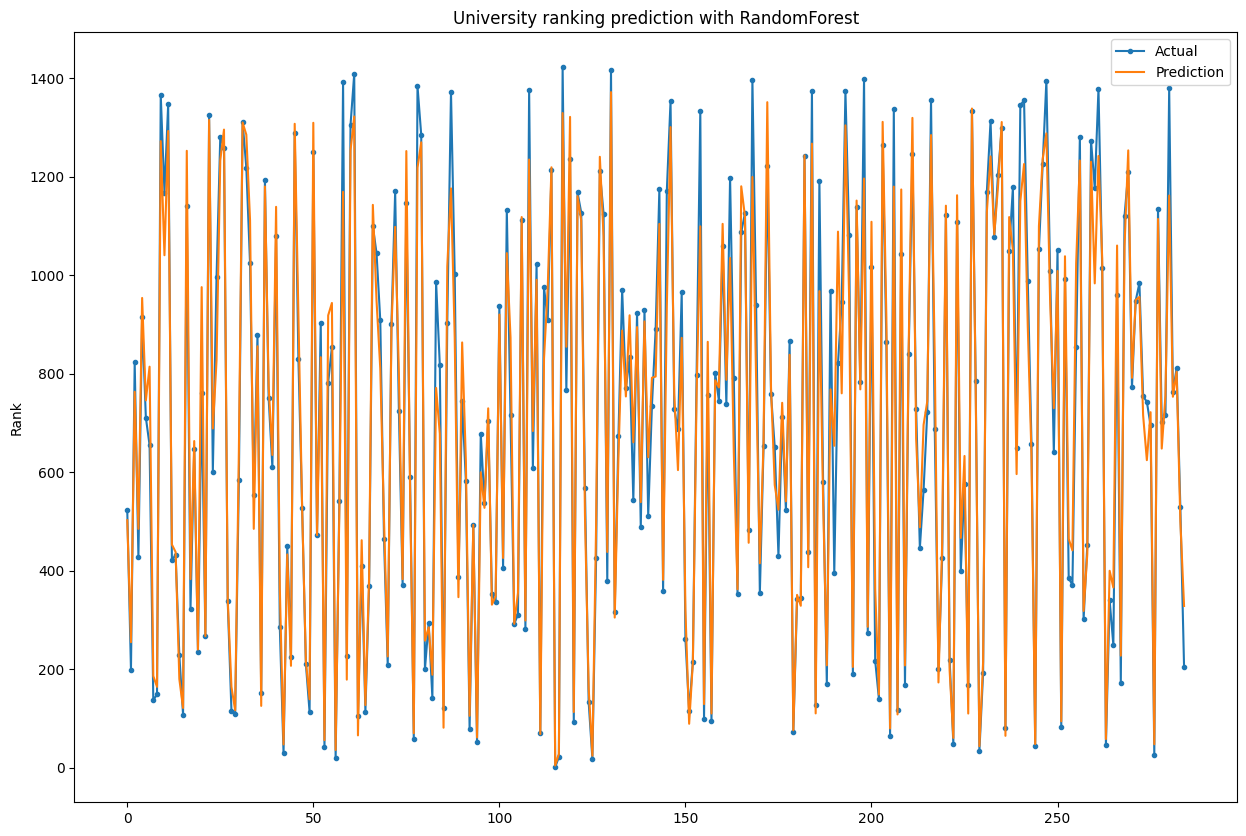

In [ ]:
# Plotting actual vs predicted values
plt.figure(figsize=(15,10))
plt.plot(range(len(y_test)), y_test, marker='.', label="Actual")
plt.plot(range(len(y_test)), y_pred.flatten(), label="Prediction")
plt.ylabel('Rank')
plt.title('University ranking prediction with RandomForest')
plt.legend()
plt.show()

In [ ]:
#Comparing the scores of all 3 models
table = [["Model", "MSE", "RMSE", "MAE", "R^2"],
         ["Random Forest", rf_mse, rf_rmse, rf_mae, rf_r],
         ["Decision Tree", dt_mse, dt_rmse, dt_mae, dt_r],
         ["Linear Regression", lr_mse, lr_rmse, lr_mae, lr_r]]

print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))

╒═══════════════════╤══════════╤══════════╤══════════╤══════════╕
│ Model             │      MSE │     RMSE │      MAE │      R^2 │
╞═══════════════════╪══════════╪══════════╪══════════╪══════════╡
│ Random Forest     │  6700.58 │  81.8571 │  59.4218 │ 0.962468 │
├───────────────────┼──────────┼──────────┼──────────┼──────────┤
│ Decision Tree     │ 17073.1  │ 130.664  │  91.4351 │ 0.904369 │
├───────────────────┼──────────┼──────────┼──────────┼──────────┤
│ Linear Regression │ 29967.2  │ 173.11   │ 143.343  │ 0.832145 │
╘═══════════════════╧══════════╧══════════╧══════════╧══════════╛


#### **Inference from the above table**

- Random Forest has the lowest MSE, RMSE, and MAE values, indicating that it performs the best out of the three models in terms of accuracy.

- Decision Tree has higher MSE, RMSE, and MAE values than Random Forest, but still performs better than Linear Regression.

- Linear Regression has the highest MSE, RMSE, and MAE values, indicating that it is the least accurate of the three models.
All three models have positive R^2 values, indicating that they are a good fit for the data, but Random Forest has the highest R^2 value, indicating that it explains the most variance in the data. Overall, Random Forest seems to be the best performing model, followed by Decision Tree and Linear Regression.

## **FEATURE IMPORTANCE: SHAP ANALYSIS**

- Feature importance is a measure of how much a particular feature (or input variable) contributes to the output of a machine learning model.
- It indicates the relative importance of each feature in the prediction of the target variable. It is often used to identify the most relevant features in a dataset and to prioritize them for further analysis or feature engineering.
- Feature importance can be estimated using various techniques, such as decision tree-based methods, permutation-based methods, or model-based methods like SHAP analysis. 

- **SHAP analysis** is a method for interpreting the predictions of machine learning models.
- It provides a quantitative measure of the contribution of each feature to the prediction of the target variable.
- SHAP values are based on game theory and measure the contribution of each feature by considering all possible combinations of features and their effects on the prediction.
- By visualizing SHAP values, we can see the impact of each feature on the prediction and how it compares to other features.
- SHAP analysis helps us to better understand the relationships between features and the target variable, identify and address issues such as bias or feature importance, and improve the interpretability and accuracy of machine learning models.

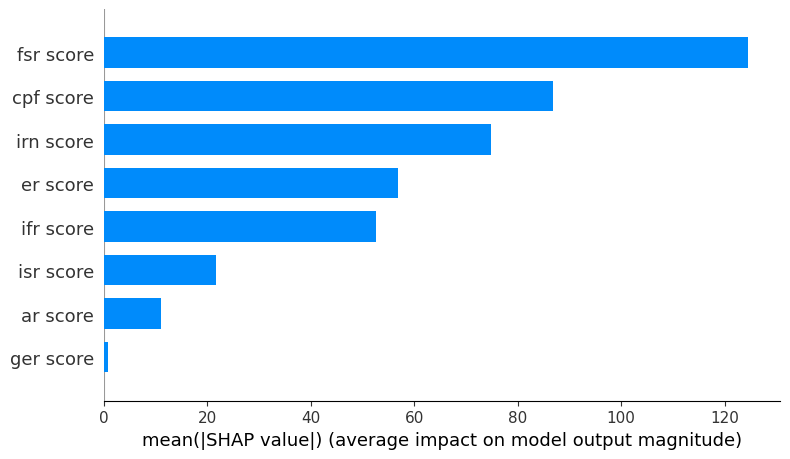

In [ ]:
# Linear Regression Model
import shap
lr_shap_explainer = shap.LinearExplainer(lr, x_train, feature_dependence="independent")
lr_shap_values = lr_shap_explainer.shap_values(x_train)
shap.summary_plot(lr_shap_values, x_train, plot_type="bar")

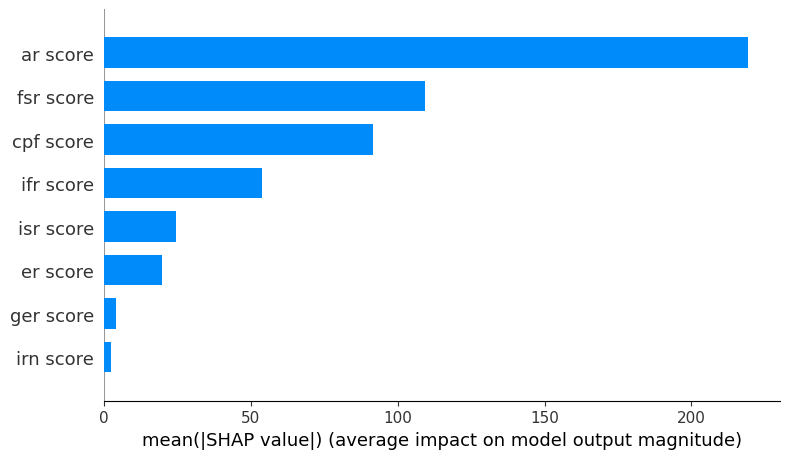

In [ ]:
# Random Forest Model
rf_shap_explainer = shap.TreeExplainer(rf)
rf_shap_values = rf_shap_explainer.shap_values(x_train)
shap.summary_plot(rf_shap_values, x_train, plot_type="bar")

### **Interpreting Waterfall SHAP visualization**

**Linear Regression Model**
- It says that f(x) = 568.113 is what we got as a model output and the expected output for this sample was 990.961. The waterfall model explains how we got the expected output, and which features contributed to what. The below graph shows that er score has the most negative impact in decreasing the rank of university, for this specific sample. 

- Considering fsr score which had a positive impact and it bought the rank of university up for this sample, and so on. Using this model we can visually interpret why exactly this specific sample is giving an output of 568.113.

**Tree-Based Model**
- Similarly we can interpret the tree-based model for the same sample.
Where the output we got was -226.708 and the expected output was 123.858. in the tree-based model, we just see that the magnitude of the impact made by individual features varies from what we had in a linear model. Here in the tree-based model, the output is equally determined by the features - The below graph shows that ar score has the most negative impact in decreasing the rank of university, for this specific sample..

### **Learning Takeaway**

We can conclude that the Random Forest model outperformed both the Decision Tree and Linear Regression models in predicting the university ranking based on various features, as indicated by its significantly lower MSE, RMSE, and MAE values and higher R^2 value.

The Waterfall SHAP visualization allowed us to interpret the impact of individual features on the output for a specific sample in both the Linear Regression and Tree-Based models. It highlighted that the importance of different features varied across the models. While in the Linear Regression model, er score had the most negative impact on the university ranking, in the Tree-Based model, ar score had the most negative impact.

# **Licences:**

Copyright (c) 2023 Shriya Pandita

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

# **References:**

Shap official documentation: https://shap.readthedocs.io/en/latest/index.html

Pandas 1.4 https://pandas.pydata.org/docs/getting_started/overview.html

Scipy.stats https://docs.scipy.org/doc/scipy/reference/stats.html

sklearn.simpleimputer https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html

QS University World Ranking dataset - https://www.kaggle.com/datasets/jkanthony/world-university-rankings-202223

Linear Regression- https://www.analyticsvidhya.com/blog/2021/05/all-you-need-to-know-about-your-first-machine-learning-model-linear-regression/

Linear Regression Assumptions- https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/assumptions-of-linear-regression/